## RFInder: tools to investigate the presence of RFI in a dataset


In [1]:
import os, string, sys
import numpy as np
import pyaml, json
from astropy.io import ascii
import logging
logger = logging.getLogger()
from IPython.display import HTML, display

import rfinder as rfinder

print '\t+------+\n\t  Done \n\t+------+'

	+------+
	  Done 
	+------+


/home/maccagni/anaconda/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


### Load and modify parameter file

In [2]:
print '\t+------+\n\t RFInder \n\t Parameter File \n\t+------+'

rfi_par = rfinder.rfinder()

print '\t+------+\n\t Parameters Loaded \n\t+------+'

#print parameter file 
print(json.dumps(rfi_par.cfg_par, indent=4, sort_keys=True))


INFO:rfinder:	 ... Reading parameter file ... 



	+------+
	 RFInder 
	 Parameter File 
	+------+
	+------+
	 Parameters Loaded 
	+------+
{
    "beam_shape": {
        "__helpstr": "estimate beam shape after RFI flagging", 
        "enable": false
    }, 
    "general": {
        "__helpstr": "General INPUT directories and filenames", 
        "field": [
            0
        ], 
        "msfullpath": "/home/maccagni/RFI/RFI91_180720006/WSRTA180720006_B000.MS", 
        "msname": [
            "WSRTA180720006_B000.MS"
        ], 
        "plotdir": "/home/maccagni/RFI/RFI91_180720006/rfi/plots/", 
        "rfidir": "/home/maccagni/RFI/RFI91_180720006/rfi/", 
        "tabledir": "/home/maccagni/RFI/RFI91_180720006/rfi/tables/", 
        "verbose": false, 
        "workdir": "/home/maccagni/RFI/RFI91_180720006/"
    }, 
    "plots": {
        "__helpstr": "plot rfi over different axes", 
        "enable": true, 
        "plot_long_short": true, 
        "plot_noise": "flag"
    }, 
    "rfi": {
        "__helpstr": "Find RFI in msfile

In [3]:
# Set working directory & filenames
#rfi_par.cfg_par['general']['workdir'] = '/home/maccagni/RFI/'

# Enable / disable modules
rfi_par.cfg_par['rfi']['enable'] = True
rfi_par.cfg_par['beam_shape']['enable'] = True
rfi_par.cfg_par['plots']['enable'] = True

#MSFILE
#rfi_par.cfg_par['general']['msname'] = ['WSRTA090807_B000.MS']

rfi_par.set_dirs()

# Options
#create also tables of data binned in frequency
rfi_par.cfg_par['rfi']['spw_average']['enable'] = True
rfi_par.cfg_par['rfi']['spw_average']['spw_width'] = 3 #MHz
#set separation in long and short baselines
rfi_par.cfg_par['rfi']['baselines_cut'] = 615 #MHz




print '\t+------+\n\t Parameters modified \n\t+------+'


	+------+
	 Parameters modified 
	+------+


### Investigate presence of RFI in a dataset

In [4]:
import rfi
import rfinder_plots as rfi_pl

rfi = rfi.rfi()

#read info from MSfile 
rfi.load_from_ms(rfi_par.cfg_par,0)




INFO:rfi:	 ... Loading MSfile ...

INFO:rfi:	Total number of antennas:	12
INFO:rfi:	Antenna names:		[ 0  1  2  3  4  5  6  7  8  9 10 11]
INFO:rfi:	Bandwidth [kHz]:	12.20703125
INFO:rfi:	Start     [GHz]:	1.174140625
INFO:rfi:	End       [GHz]:	1.37412841797



Successful readonly open of default-locked table /home/maccagni/RFI/RFI91_180720006/WSRTA180720006_B000.MS/ANTENNA: 8 columns, 12 rows
Successful readonly open of default-locked table /home/maccagni/RFI/RFI91_180720006/WSRTA180720006_B000.MS/SPECTRAL_WINDOW: 14 columns, 1 rows
Successful readonly open of default-locked table /home/maccagni/RFI/RFI91_180720006/WSRTA180720006_B000.MS: 23 columns, 18330 rows


INFO:rfinder_stats:	 ...  Predicting natural r.m.s. ... 

INFO:rfinder_stats:	 Assumptions on wsrt telescope
INFO:rfinder_stats:		Dish diameter = 25.0 m
INFO:rfinder_stats:		 ... and SEFD = 523.131552 Jy
INFO:rfinder_stats:		 ... and Tsys = 93.0 K
INFO:rfinder_stats:		 antenna diam = 25.0 m

INFO:rfinder_stats:	 Assumptions on wsrt telescope
INFO:rfinder_stats:		 Total number of channels = 16384
INFO:rfinder_stats:		 Observing time on source = 2.00533 h (2 polarisations)

INFO:rfinder_stats:	 Stokes I natural rms       = 2.425e+00 mJy/b 
INFO:rfinder_stats:	 ... Natural r.m.s. predicted ... 

INFO:rfi:	 ... info from MS file loaded  




0

In [5]:
import rfi
import rfinder_plots as rfi_pl

rfi = rfi.rfi()

#read info from MSfile 
rfi.load_from_ms(rfi_par.cfg_par,0)
#sort visibilities by baseline lenght
rfi.baselines_from_ms(rfi_par.cfg_par)
#flag bad antennas (from configuration file)
datas = rfi.priors_flag(rfi_par.cfg_par)
#find rfi above threshold
rfi.find_rfi(datas,rfi_par.cfg_par,-1)
rfi_pl.rfi_frequency(rfi_par.cfg_par,-1)


print '\t+------+\n\t Done \n\t+------+'


INFO:rfi:	 ... Loading MSfile ...

INFO:rfi:	Total number of antennas:	12
INFO:rfi:	Antenna names:		[ 0  1  2  3  4  5  6  7  8  9 10 11]
INFO:rfi:	Bandwidth [kHz]:	12.20703125
INFO:rfi:	Start     [GHz]:	1.174140625
INFO:rfi:	End       [GHz]:	1.37412841797



Successful readonly open of default-locked table /home/maccagni/RFI/RFI91_180720006/WSRTA180720006_B000.MS/ANTENNA: 8 columns, 12 rows
Successful readonly open of default-locked table /home/maccagni/RFI/RFI91_180720006/WSRTA180720006_B000.MS/SPECTRAL_WINDOW: 14 columns, 1 rows
Successful readonly open of default-locked table /home/maccagni/RFI/RFI91_180720006/WSRTA180720006_B000.MS: 23 columns, 18330 rows


INFO:rfinder_stats:	 ...  Predicting natural r.m.s. ... 

INFO:rfinder_stats:	 Assumptions on wsrt telescope
INFO:rfinder_stats:		Dish diameter = 25.0 m
INFO:rfinder_stats:		 ... and SEFD = 523.131552 Jy
INFO:rfinder_stats:		 ... and Tsys = 93.0 K
INFO:rfinder_stats:		 antenna diam = 25.0 m

INFO:rfinder_stats:	 Assumptions on wsrt telescope
INFO:rfinder_stats:		 Total number of channels = 16384
INFO:rfinder_stats:		 Observing time on source = 2.00533 h (2 polarisations)
INFO:rfinder_stats:	 Stokes I natural rms       = 3.430e+00 mJy/b 
INFO:rfinder_stats:	 ... Natural r.m.s. predicted ... 

INFO:rfi:	 ... info from MS file loaded  


INFO:rfi:	 ... Sorting baselines ... 

INFO:rfi:	 ... Matrix of baselines sorted by length loaded ...


INFO:rfi:	 ... Flagging a-prioris  ...



[[12207.03125 12207.03125 12207.03125 ... 12207.03125 12207.03125
  12207.03125]]


INFO:rfi:	 ... Prior flagging done ...


INFO:rfi:	 ... Searching for RFI ...

INFO:rfi:	 ... Wrtiting RFI by frequency and baseline ...
INFO:rfi:	 ... RFI on fits file ...

INFO:rfi:	 ... RFI found ... 


INFO:rfinder_plots:	 ... RFI table saved ...



	+------+
	 Done 
	+------+


### Plot RFI

INFO:rfi:	 ... Loading MSfile ...

INFO:rfi:	Total number of antennas	:12
INFO:rfi:	Antenna names	[ 0  1  2  3  4  5  6  7  8  9 10 11]
INFO:rfi:	Bandwidth [kHz]	:12.20703125
INFO:rfi:	Start Frequency [MHz]	:1.174140625
INFO:rfi:	End Frequency [MHz]	:1.37412841797



Successful readonly open of default-locked table /home/maccagni/RFI/RFI91_180720006/WSRTA180720006_B000.MS/ANTENNA: 8 columns, 12 rows
Successful readonly open of default-locked table /home/maccagni/RFI/RFI91_180720006/WSRTA180720006_B000.MS/SPECTRAL_WINDOW: 14 columns, 1 rows
Successful readonly open of default-locked table /home/maccagni/RFI/RFI91_180720006/WSRTA180720006_B000.MS: 23 columns, 18330 rows


INFO:rfi:	 ... info from MS file loaded  


INFO:rfi:	 ... Sorting baselines ... 

INFO:rfi:	 ... Matrix of baselines sorted by length loaded ...


INFO:rfi:	 ...  Observing time Info ... 

INFO:rfi:	 Start date: 18Jul21:12:25:16
INFO:rfi:	 End date: 18Jul21:14:25:04 


INFO:rfi:	 ...  Observing time Info ... 

INFO:rfi:	 Start date: 18Jul21:12:25:16
INFO:rfi:	 End date: 18Jul21:14:25:04 




Successful readonly open of default-locked table /home/maccagni/RFI/RFI91_180720006/WSRTA180720006_B000.MS: 23 columns, 18330 rows
... RFI in 2D plotted ----
Successful readonly open of default-locked table /home/maccagni/RFI/RFI91_180720006/WSRTA180720006_B000.MS: 23 columns, 18330 rows


INFO:rfi:	 ...  Observing time Info ... 

INFO:rfi:	 Start date: 18Jul21:12:25:16
INFO:rfi:	 End date: 18Jul21:14:25:04 




... RFI in 1D plotted ----
Successful readonly open of default-locked table /home/maccagni/RFI/RFI91_180720006/WSRTA180720006_B000.MS: 23 columns, 18330 rows
... RFI in 1D plotted ----
	+------+
	 Plots done 
	+------+


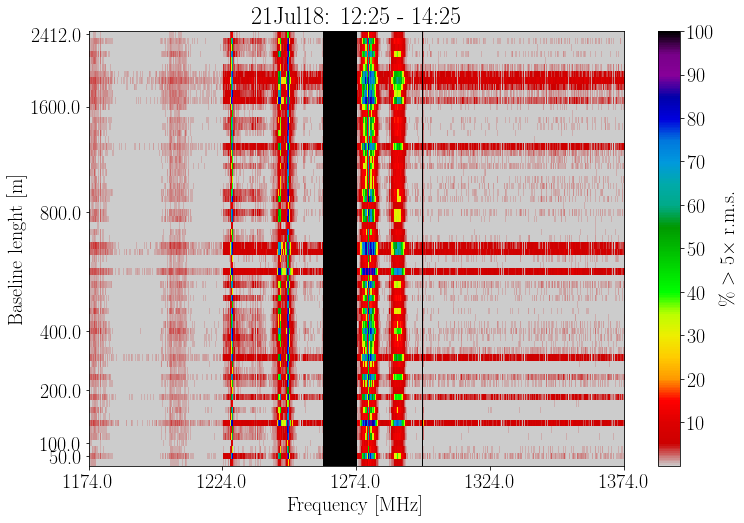

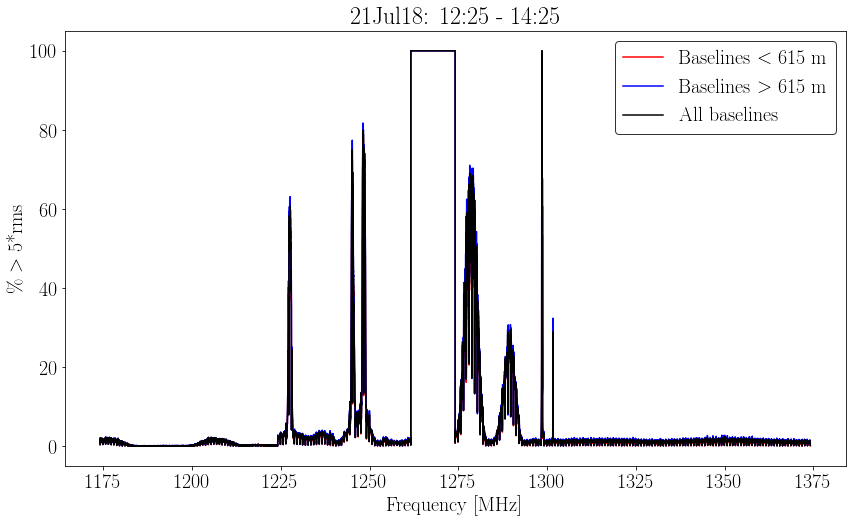

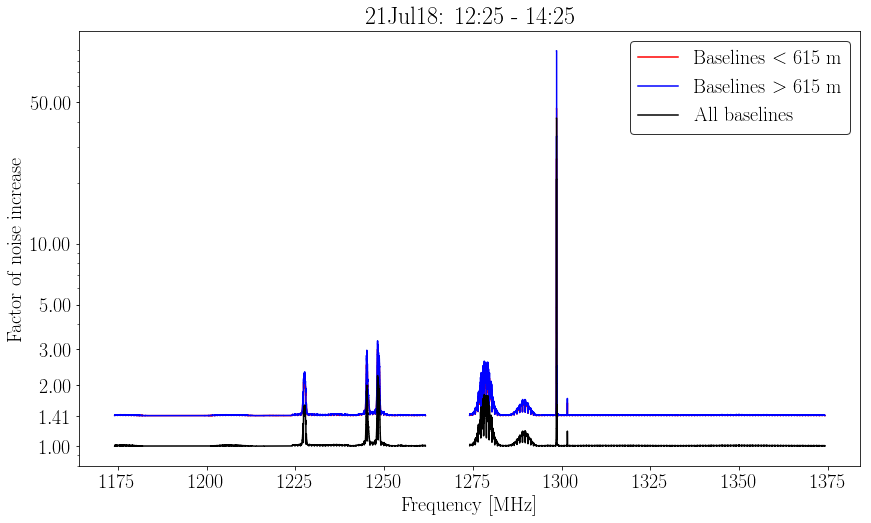

In [5]:
import rfi
import rfinder_plots as rfi_pl

rfi = rfi.rfi()
#plot spectra
#read info from MSfile 
rfi.load_from_ms(rfi_par.cfg_par,0)
#sort visibilities by baseline lenght
rfi.baselines_from_ms(rfi_par.cfg_par)
rfi_pl.plot_rfi_imshow(rfi_par.cfg_par,-1)
#rfi_pl.rfi_frequency(rfi_par.cfg_par,-1)
rfi_pl.plot_noise_frequency(rfi_par.cfg_par,-1)

rfi_par.cfg_par['plots']['long_short'] = True
rfi_par.cfg_par['plots']['plot_noise'] = 'noise'

rfi_pl.plot_noise_frequency(rfi_par.cfg_par,-1)


print '\t+------+\n\t Plots done \n\t+------+'


### Determine RFI in data every time step store it in .fits tables

In [6]:
import rfi
import rfinder_plots as rfi_pl

rfi = rfi.rfi()

rfi_par.cfg_par['rfi']['time_chunks']['enable'] = True
rfi_par.cfg_par['rfi']['time_chunks']['time_step'] = 10 #in minutes

rfi_par.cfg_par['plots']['long_short'] = True
rfi_par.cfg_par['plots']['plot_noise'] = 'flag'

#read info from MSfile 
#rfi.load_from_ms(rfi_par.cfg_par)
times,start,end = rfi.time_chunk(rfi_par.cfg_par)
for i in xrange(0,len(times)-1):
    
    timez = [times[i],times[i+1]] 
    rfi.load_from_ms(rfi_par.cfg_par,timez)
    #sort visibilities by baseline lenght
    rfi.baselines_from_ms(rfi_par.cfg_par)

    #flag bad antennas (from configuration file)
    datas = rfi.priors_flag(rfi_par.cfg_par)

    #find rfi above threshold
    rfi.find_rfi(datas,rfi_par.cfg_par,i)
    rfi_pl.rfi_frequency(rfi_par.cfg_par,i)

    
    rfi_pl.plot_rfi_imshow(rfi_par.cfg_par,i)

    rfi_pl.plot_noise_frequency(rfi_par.cfg_par,i)

#create FLAG column in copy of MS file
#rfi.rfi_flag(rfi_par.cfg_par)

print '\t+------+\n\t Done \n\t+------+'

Successful readonly open of default-locked table /home/maccagni/RFI/RFI91_180720006/WSRTA180720006_B000.MS: 23 columns, 18330 rows
Start date: 18Jul21:12:25:16
End date: 18Jul21:14:25:04
Successful readonly open of default-locked table /home/maccagni/RFI/RFI91_180720006/WSRTA180720006_B000.MS/ANTENNA: 8 columns, 12 rows
	Total number of antennas	:12
	Antenna names	[ 0  1  2  3  4  5  6  7  8  9 10 11]
Successful readonly open of default-locked table /home/maccagni/RFI/RFI91_180720006/WSRTA180720006_B000.MS/SPECTRAL_WINDOW: 14 columns, 1 rows
	Bandwidth [kHz]	:12.20703125
	Start Frequency [GHz]	:1.174140625
	End Frequency [GHz]	:1.37412841796875
Successful readonly open of default-locked table /home/maccagni/RFI/RFI91_180720006/WSRTA180720006_B000.MS: 23 columns, 18330 rows
... info from MS loaded ...

... baselines loaded...

... prior flagging done...

1400000000.0 1174140625.0 1174140625.0


KeyboardInterrupt: 

### Determine shape of PSF after RFI flagging

In [ ]:
import rfinder_beam as rfi_beam

#create FLAG column in copy of MS file
rfi.rfi_flag(rfi_par.cfg_par)
beam = rfi_beam.make_psf(rfi_par.cfg_par)

print '\t+------+\n\t Spectra extracted \n\t+------+'
